Download the dataframe: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment

The data frame has tweets referring to 6 different airlines.

In [58]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import re
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Description of the dataframe

In [59]:
filename = 'C:/Users/Lucía Alvarez/OneDrive - psico.edu.uy/00 Barcelona activa/Tweets.csv'

#Load the data
df = pd.read_csv(filename) 

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [61]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

<AxesSubplot:ylabel='airline'>

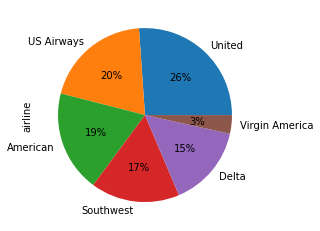

In [62]:
# Graph to observe the number of tweets for each airline:

df.airline.value_counts().plot(kind='pie', autopct="%1.0f%%")

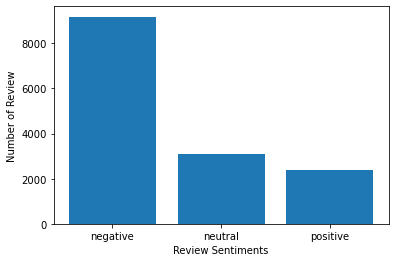

In [63]:
Sentiment_count=df.groupby('airline_sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['text'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [64]:
# Tokenizer to remove unwanted elements from the data, such as symbols and numbers.

# Tokenizer to remove unwanted elements from the data, such as symbols and numbers.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['text'])

X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['airline_sentiment'], test_size=0.3, random_state=1)

# Model generation by Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("Accuracy MultinomialNB :",metrics.accuracy_score(y_test, predicted))

Accuracy MultinomialNB : 0.7490892531876139


A classification rate of 74.91% was obtained.

In [65]:
#Feature generation by means of TF-IDF
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['text'])

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    text_tf, df['airline_sentiment'], test_size=0.3, random_state=123)

# Model Generation Using Multinomial Naive Bayes
clf_2 = MultinomialNB().fit(X_train_2, y_train_2)
predicted_2= clf_2.predict(X_test_2)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test_2, predicted_2))

MultinomialNB Accuracy: 0.6755464480874317


A classification rate of 67.55% was obtained.

To finish this exercise, another sentiment analysis is performed in order to clean the data and perform the accuracy analysis again.

The data cleaning could be performed in the same script. 
However, it was preferred to make a script that performs it step by step

In [66]:
# The first operation is to remove all links, since they have no predictive meaning.
df["clean_text"] = df["text"].apply(lambda s: ' '.join(re.sub("(w+://S+)", " ", s).split()))
df[["text","clean_text"]]

,text,clean_text
0,@VirginAmerica What @dhepburn said.,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,@AmericanAir thank you we got on a different f...,@AmericanAir thank you we got on a different f...
14636,@AmericanAir leaving over 20 minutes Late Flig...,@AmericanAir leaving over 20 minutes Late Flig...
14637,@AmericanAir Please bring American Airlines to...,@AmericanAir Please bring American Airlines to...
14638,"@AmericanAir you have my money, you change my ...","@AmericanAir you have my money, you change my ..."


In [67]:
# Remove punctuation from words
df["clean_text"] = df["clean_text"].apply(lambda s: ' '.join(re.sub("[.,!?:;-='...@#_]", " ", s).split()))
df[["text","clean_text"]]

,text,clean_text
0,@VirginAmerica What @dhepburn said.,VirginAmerica What dhepburn said
1,@VirginAmerica plus you've added commercials t...,VirginAmerica plus you ve added commercials to...
2,@VirginAmerica I didn't today... Must mean I n...,VirginAmerica I didn t today Must mean I need ...
3,@VirginAmerica it's really aggressive to blast...,VirginAmerica it s really aggressive to blast ...
4,@VirginAmerica and it's a really big bad thing...,VirginAmerica and it s a really big bad thing ...
...,...,...
14635,@AmericanAir thank you we got on a different f...,AmericanAir thank you we got on a different fl...
14636,@AmericanAir leaving over 20 minutes Late Flig...,AmericanAir leaving over 20 minutes Late Fligh...
14637,@AmericanAir Please bring American Airlines to...,AmericanAir Please bring American Airlines to ...
14638,"@AmericanAir you have my money, you change my ...",AmericanAir you have my money you change my fl...


In [68]:
# Remove all non-alphabetic characters
df['clean_text'] = df['clean_text'].str.replace("[^a-zA-Z#]", " ")

df[["text","clean_text"]]

,text,clean_text
0,@VirginAmerica What @dhepburn said.,VirginAmerica What dhepburn said
1,@VirginAmerica plus you've added commercials t...,VirginAmerica plus you ve added commercials to...
2,@VirginAmerica I didn't today... Must mean I n...,VirginAmerica I didn t today Must mean I need ...
3,@VirginAmerica it's really aggressive to blast...,VirginAmerica it s really aggressive to blast ...
4,@VirginAmerica and it's a really big bad thing...,VirginAmerica and it s a really big bad thing ...
...,...,...
14635,@AmericanAir thank you we got on a different f...,AmericanAir thank you we got on a different fl...
14636,@AmericanAir leaving over 20 minutes Late Flig...,AmericanAir leaving over minutes Late Fligh...
14637,@AmericanAir Please bring American Airlines to...,AmericanAir Please bring American Airlines to ...
14638,"@AmericanAir you have my money, you change my ...",AmericanAir you have my money you change my fl...


In [69]:
# Remove emojis

def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
df["clean_text"] = df["clean_text"].apply(lambda s: deEmojify(s))
df[["text","clean_text"]]

,text,clean_text
0,@VirginAmerica What @dhepburn said.,VirginAmerica What dhepburn said
1,@VirginAmerica plus you've added commercials t...,VirginAmerica plus you ve added commercials to...
2,@VirginAmerica I didn't today... Must mean I n...,VirginAmerica I didn t today Must mean I need ...
3,@VirginAmerica it's really aggressive to blast...,VirginAmerica it s really aggressive to blast ...
4,@VirginAmerica and it's a really big bad thing...,VirginAmerica and it s a really big bad thing ...
...,...,...
14635,@AmericanAir thank you we got on a different f...,AmericanAir thank you we got on a different fl...
14636,@AmericanAir leaving over 20 minutes Late Flig...,AmericanAir leaving over minutes Late Fligh...
14637,@AmericanAir Please bring American Airlines to...,AmericanAir Please bring American Airlines to ...
14638,"@AmericanAir you have my money, you change my ...",AmericanAir you have my money you change my fl...


In [70]:
# Remove stopwords
stop = set(stopwords.words('english'))

def rem_en(input_txt):
    words = input_txt.lower().split()
    noise_free_words = [word for word in words if word not in stop] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

df["clean_text"] = df["clean_text"].apply(lambda s: rem_en(s))
df[["text","clean_text"]]

,text,clean_text
0,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said
1,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercials experienc...
2,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anothe...
3,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...
4,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing
...,...,...
14635,@AmericanAir thank you we got on a different f...,americanair thank got different flight chicago
14636,@AmericanAir leaving over 20 minutes Late Flig...,americanair leaving minutes late flight warnin...
14637,@AmericanAir Please bring American Airlines to...,americanair please bring american airlines bla...
14638,"@AmericanAir you have my money, you change my ...",americanair money change flight answer phones ...


In [71]:
#Copy the two columns in a new dataframe
df_subset = df[['tweet_id', 'clean_text']].copy()
df_subset

,tweet_id,clean_text
0,570306133677760513,virginamerica dhepburn said
1,570301130888122368,virginamerica plus added commercials experienc...
2,570301083672813571,virginamerica today must mean need take anothe...
3,570301031407624196,virginamerica really aggressive blast obnoxiou...
4,570300817074462722,virginamerica really big bad thing
...,...,...
14635,569587686496825344,americanair thank got different flight chicago
14636,569587371693355008,americanair leaving minutes late flight warnin...
14637,569587242672398336,americanair please bring american airlines bla...
14638,569587188687634433,americanair money change flight answer phones ...


Evaluate accuracy after dataframe debugging

In [72]:
#Feature generation using a Bag of Words with cleaned data
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts_3= cv.fit_transform(df['clean_text'])


X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    text_counts_3, df['airline_sentiment'], test_size=0.3, random_state=1)

clf_3 = MultinomialNB().fit(X_train_3, y_train_3)
predicted_3= clf_3.predict(X_test_3)

print("MultinomialNB accuracy after data cleaning :",metrics.accuracy_score(y_test_3, predicted_3))

MultinomialNB accuracy after data cleaning : 0.7477231329690346


In [73]:
print("In this case, we can see that the accuracy of the Bag of Words Feature Generation Model is slightly higher when the data is cleaned."
      , round(metrics.accuracy_score(y_test_3, predicted_3),4) , "when comparing the result without depuration"
      , round(metrics.accuracy_score(y_test, predicted),4))

In this case, we can see that the accuracy of the Bag of Words Feature Generation Model is slightly higher when the data is cleaned. 0.7477 when comparing the result without depuration 0.7491


In [74]:
#Feature generation by TF-IDF with the cleaned data
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['clean_text'])

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(
    text_tf, df['airline_sentiment'], test_size=0.3, random_state=123)

clf = MultinomialNB().fit(X_train_4, y_train_4)
predicted_4= clf.predict(X_test_4)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test_4, predicted_4))


MultinomialNB Accuracy: 0.6873861566484517


In [75]:
print("In this case, we can see that the accuracy of the Bag of Words Feature Generation Model is slightly higher when the data is cleaned."
      , round(metrics.accuracy_score(y_test_4, predicted_4),4) , "when comparing the result without depuration"
      , round(metrics.accuracy_score(y_test_2, predicted_2),4))

In this case, we can see that the accuracy of the Bag of Words Feature Generation Model is slightly higher when the data is cleaned. 0.6874 when comparing the result without depuration 0.6755


To finish this exercise, polarity scores of the feelings are generated and visualized.

In [76]:
# Empty dataframe for later data entry:
df1=pd.DataFrame()
df1['tweet_id']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

In this analysis only "compound" is going to be observed since it is an overall score that combines negative, positive and neutral sentiments into a single score.

In [77]:
print('Sentiment analysis processing...')
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['tweet_id']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df=t_df.append(df1)
#remove dummy row with tweet_id = 9999999999999999999
t_df_cleaned = t_df[t_df.tweet_id != '99999999999']

#remove duplicates if they exist
t_df_cleaned = t_df_cleaned.drop_duplicates()

# retain only rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
print(t_df_cleaned.head(10))

Sentiment analysis processing...
             tweet_id sentiment_type  sentiment_score
0  570306133677760513       compound           0.0000
0  570301130888122368       compound           0.0000
0  570301083672813571       compound           0.0000
0  570301031407624196       compound          -0.3306
0  570300817074462722       compound          -0.5829
0  570300767074181121       compound          -0.6240
0  570300616901320704       compound           0.4019
0  570300248553349120       compound           0.1458
0  570299953286942721       compound           0.2732
0  570295459631263746       compound           0.7717


In [80]:
# Merge the obtained data with the previous table.
df_output = pd.merge(df, t_df_cleaned, on='tweet_id', how='inner')
print(df_output.head(10))

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   
5  570300767074181121          negative                        1.0000   
6  570300616901320704          positive                        0.6745   
7  570300248553349120           neutral                        0.6340   
8  570299953286942721          positive                        0.6559   
9  570295459631263746          positive                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2      

Visualize the output of the sentiment analysis

In [81]:
df_output[["sentiment_score"]].describe()

,sentiment_score
count,14950.000000
mean,0.173058
std,0.438509
min,-0.974700
25%,-0.051600
50%,0.177900
75%,0.510600
max,0.971600


Display the average sentiment_score per airline.

<AxesSubplot:title={'center':'sentiment_score'}, xlabel='Airline', ylabel='Mean Sentiment Score'>

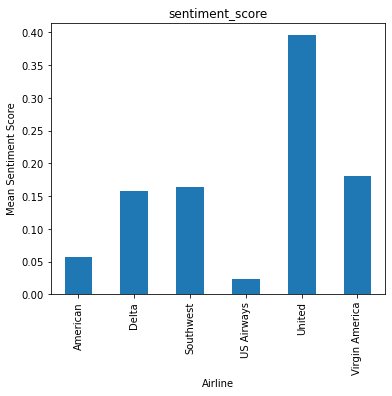

In [82]:
dfg = df_output.groupby(['airline'])['sentiment_score'].mean()
dfg.plot(kind='bar', title='sentiment_score', ylabel='Mean Sentiment Score',
         xlabel='Airline', figsize=(6, 5))

Display data obtained by a box plots by airline


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Virgin America'),
  Text(1, 0, 'United'),
  Text(2, 0, 'Southwest'),
  Text(3, 0, 'Delta'),
  Text(4, 0, 'US Airways'),
  Text(5, 0, 'American')])

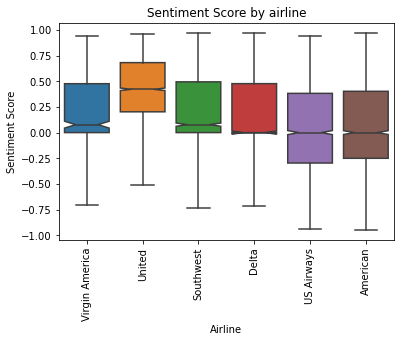

In [83]:
sns.boxplot(x='airline', y='sentiment_score', notch = True,
            data=df_output, showfliers=False).set(title='Sentiment Score by airline')

plt.xlabel('Airline')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=90)

## Recommended web pages

https://www.datacamp.com/tutorial/text-analytics-beginners-nltk

https://stackabuse.com/removing-stop-words-from-strings-in-python/

https://www.arsys.es/blog/analisis-sentimientos-python-jupyter-notebooks

https://www.datacamp.com/tutorial/text-analytics-beginners-nltk

https://pharos.sh/python-para-pnl-analisis-de-sentimiento-con-scikit-learn/


https://unipython.com/como-limpiar-el-texto-manualmente-usando-nltk/

https://stackoverflow.com/questions/33098040/how-to-use-word-tokenize-in-data-frame

https://www.red-gate.com/simple-talk/development/data-science-development/sentiment-analysis-python/